In [10]:
# Feature importance (coefficients)

from sklearn.linear_model import LinearRegression
from data import *
from model import *

taxi_type = GREEN
train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = LinearRegression()

FEATURES = [
            # 'do_location_id', 'congestion_surcharge', 'tolls_amount','pu_location_id',
            'passenger_count', 'trip_distance', 
            'tip_amount', 'mta_tax', 'extra', 
             'trip_duration', 'improvement_surcharge']

# Training
with DR.engn.connect() as conn:
    processed = 0
    for df in pd.read_sql(train_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y = df[VARIABLE]

        model.fit(X, y)
        O.out(f'Trained {processed} rows')

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)
print(importance)

                 Feature  Importance
6  improvement_surcharge    6.646001
1          trip_distance    2.120685
2             tip_amount    0.219024
0        passenger_count    0.089582
5          trip_duration    0.005426
4                  extra   -0.072456
3                mta_tax   -8.362908


In [11]:
# Predictions
with DR.engn.connect() as conn:
    processed = 0
    y_test = []
    y_pred = []
    for df in pd.read_sql(test_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y_test.append(df[VARIABLE])

        y_pred.append(model.predict(X))
        O.out(f'Predicted {processed} rows')

# Performance
merged_y_test = pd.concat(y_test, ignore_index=True)
merged_y_pred = np.concatenate(y_pred)

showPerformance(merged_y_test, merged_y_pred)

Model Accuracy Metrics:
Mean Absolute Error (MAE): 3.10
Root Mean Squared Error (RMSE): 4.96
R-squared (Accuracy): 0.82


In [1]:
# Feature importance (coefficients)

from sklearn.linear_model import LinearRegression
from data import *
from model import *

taxi_type = GREEN
train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = LinearRegression()

# FEATURES = ['pu_location_id', 'do_location_id', 'passenger_count', 'trip_distance', 
#             'trip_duration', 'tip_amount', 'mta_tax', 'tolls_amount', 'extra', 
#             'improvement_surcharge', 'congestion_surcharge']

# Training
with DR.engn.connect() as conn:
    processed = 0
    for df in pd.read_sql(train_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y = df[VARIABLE]

        model.fit(X, y)
        O.out(f'Trained {processed} rows')

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)
print(importance)

sql engine ready
                  Feature  Importance
9   improvement_surcharge    6.588778
3           trip_distance    2.116855
5              tip_amount    0.236459
2         passenger_count    0.089931
4           trip_duration    0.005469
0          pu_location_id    0.001913
1          do_location_id   -0.000644
7            tolls_amount   -0.022507
8                   extra   -0.039961
10   congestion_surcharge   -0.129699
6                 mta_tax   -8.302257


In [1]:
from sklearn.linear_model import LinearRegression
from data import *
from model import *

taxi_type = GREEN
train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = LinearRegression()

# Training
with DR.engn.connect() as conn:
    processed = 0
    for df in pd.read_sql(train_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y = df[VARIABLE]

        model.fit(X, y)
        O.out(f'Trained {processed} rows')

storeModel(model, f'{taxi_type}_{VARIABLE}_{LINEAR_REGRESSION}')

# Predictions
with DR.engn.connect() as conn:
    processed = 0
    y_test = []
    y_pred = []
    for df in pd.read_sql(test_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y_test.append(df[VARIABLE])

        y_pred.append(model.predict(X))
        O.out(f'Predicted {processed} rows')

# Performance
merged_y_test = pd.concat(y_test, ignore_index=True)
merged_y_pred = np.concatenate(y_pred)

showPerformance(merged_y_test, merged_y_pred)

sql engine ready
Model Accuracy Metrics:
Mean Absolute Error (MAE): 3.09
Root Mean Squared Error (RMSE): 4.95
R-squared (Accuracy): 0.82


In [1]:
from model import *

data = readData(taxi_type=GREEN)

sql engine ready
1675331
1011017
802356
757206


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data[FEATURES]
y = data[VARIABLE]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import plotly.graph_objects as go

# Calculate Model Accuracy Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")

# Limit data to 150 samples for visualization
samples_to_plot = 150
y_test_limited = y_test[:samples_to_plot].reset_index(drop=True)
y_pred_limited = y_pred[:samples_to_plot]

# Create Line Chart with Plotly
fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=y_test_limited.index, 
    y=y_test_limited, 
    mode="lines+markers", 
    name="Actual",
    line=dict(color="blue")
))

# Predicted Values
fig.add_trace(go.Scatter(
    x=y_test_limited.index, 
    y=y_pred_limited, 
    mode="lines+markers", 
    name="Predicted",
    line=dict(color="orange")
))

# Customize Layout
fig.update_layout(
    title="Actual vs Predicted Fare Amount (Limited to 150 Samples)",
    xaxis_title="Sample Index",
    yaxis_title="Fare Amount ($)",
    legend=dict(x=0.5, y=1.15, xanchor="center", yanchor="top"),
    template="plotly_white"
)

# Show the plot
fig.show()


Model Accuracy Metrics:
Mean Absolute Error (MAE): 2.97
Root Mean Squared Error (RMSE): 5.27
R-squared (Accuracy): 0.81


In [3]:
from sklearn.linear_model import LinearRegression
from data import *
from model import *

taxi_type = GREEN
train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = LinearRegression()

# Training
with DR.engn.connect() as conn:
    X_chunks = []
    y_chunks = []
    for df in pd.read_sql(train_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        y = df[VARIABLE]

        model.fit(X, y)
        X_chunks.append(X)
        y_chunks.append(y)
        O.out(f'Trained {processed} rows')


In [5]:
X_train = pd.concat(X_chunks, ignore_index=True)
y_train = pd.concat(y_chunks, ignore_index=True)

y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Model Accuracy Metrics:")
print(f"Mean Squared Error (RMSE): {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")

Model Accuracy Metrics:
Mean Squared Error (RMSE): 8.22
R-squared (Accuracy): 0.91


sql engine ready
Mean Squared Error: 24.463477028375703


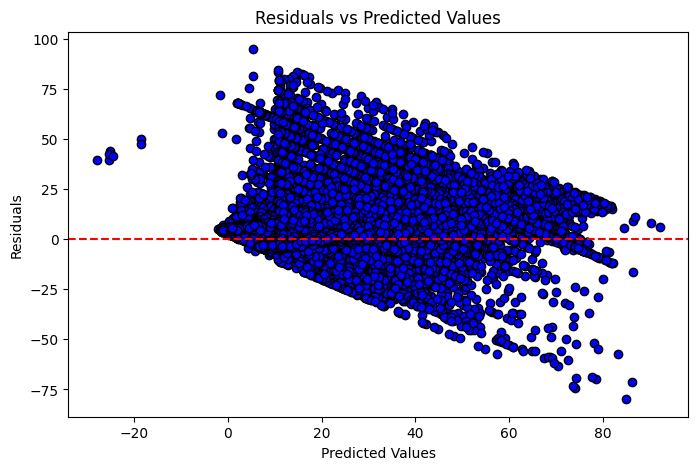

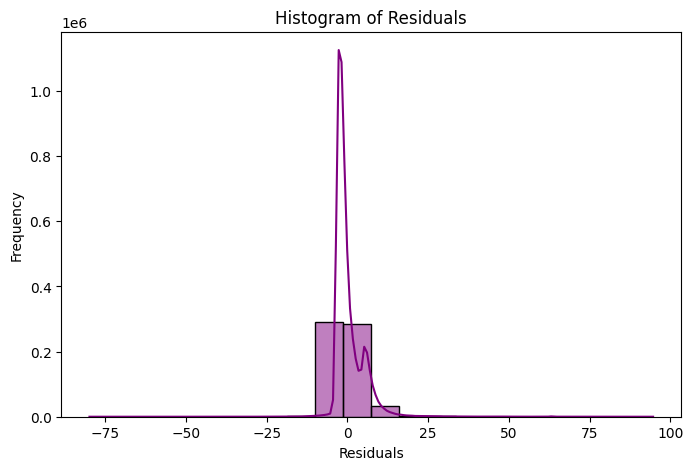

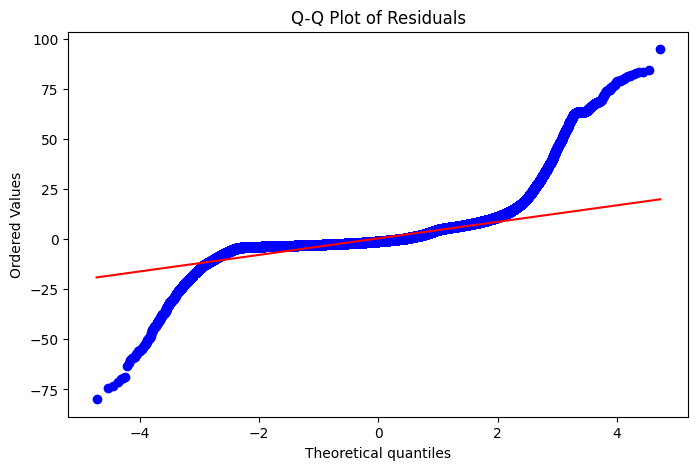

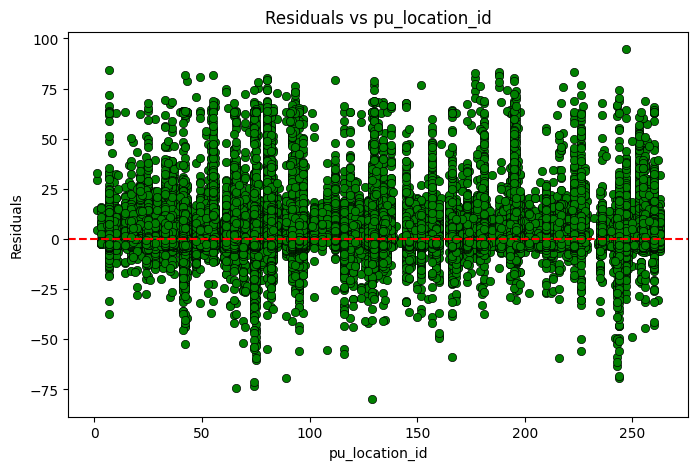

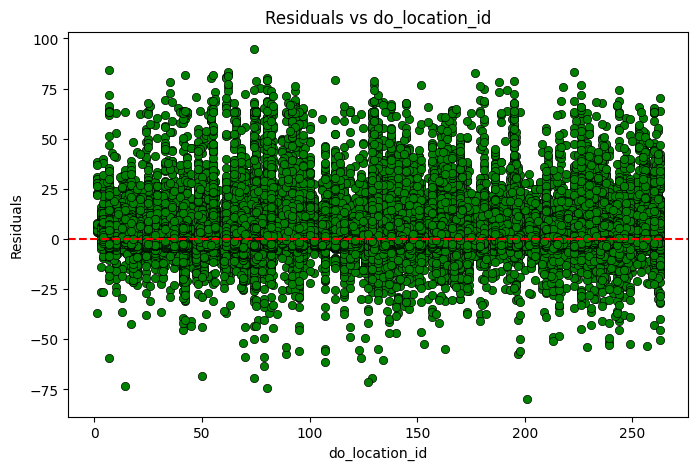

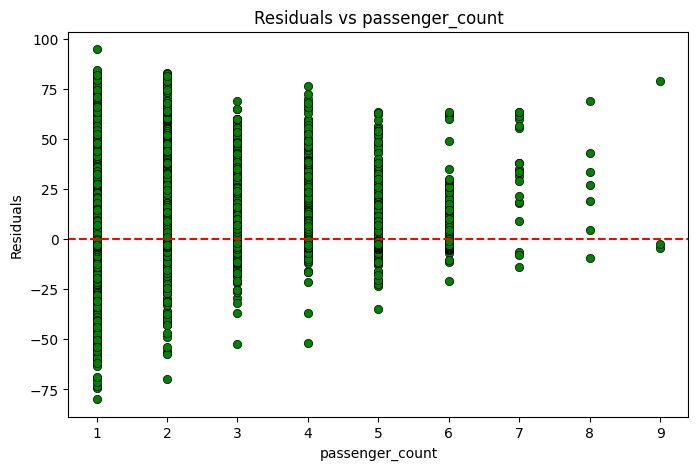

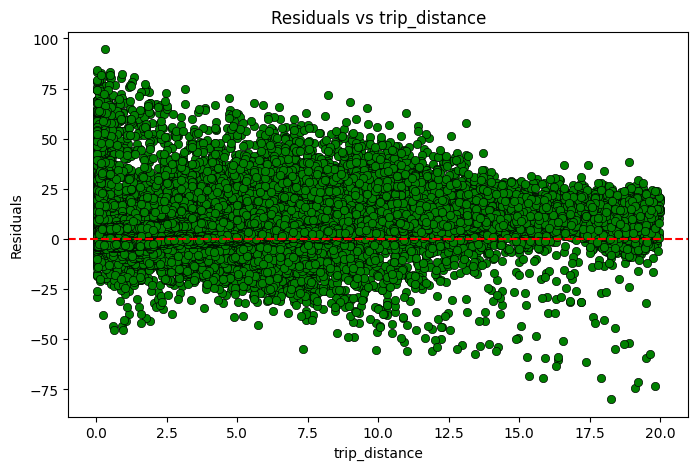

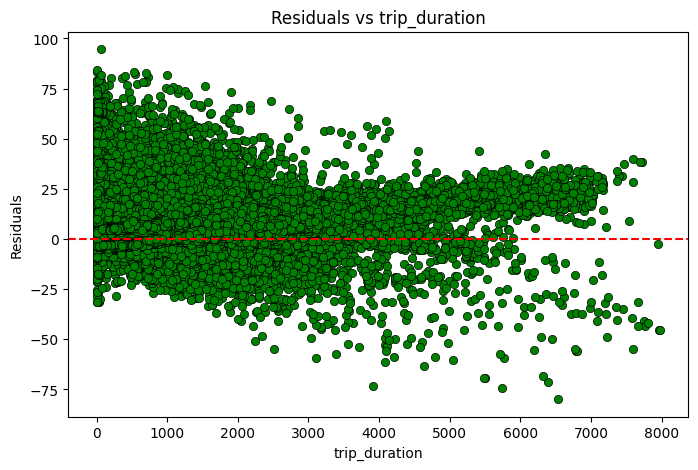

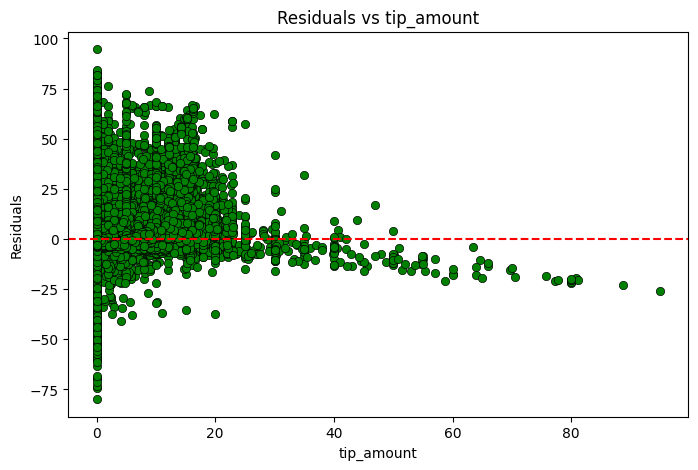

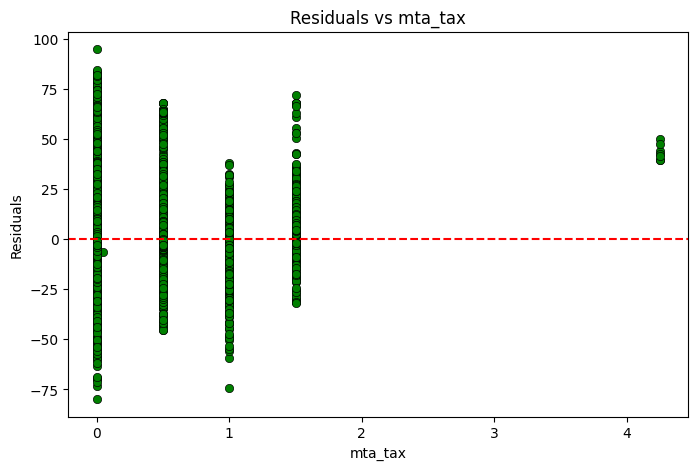

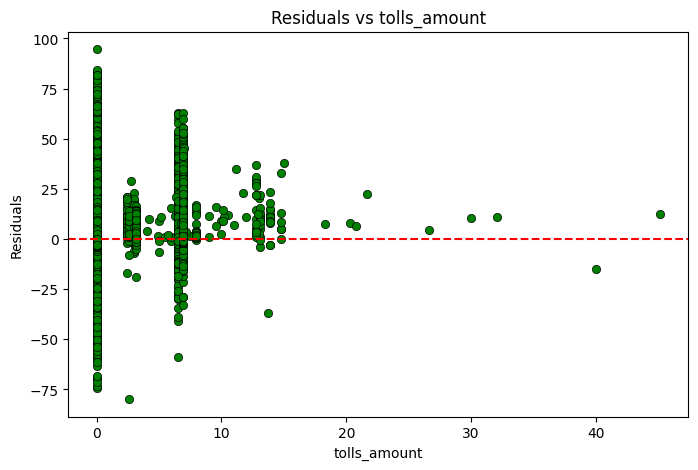

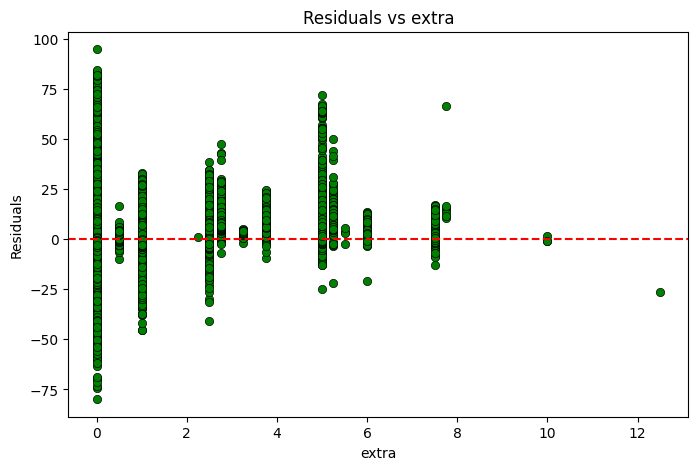

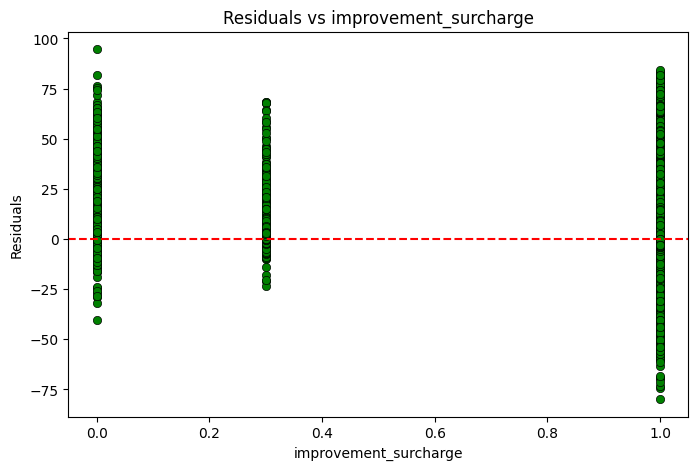

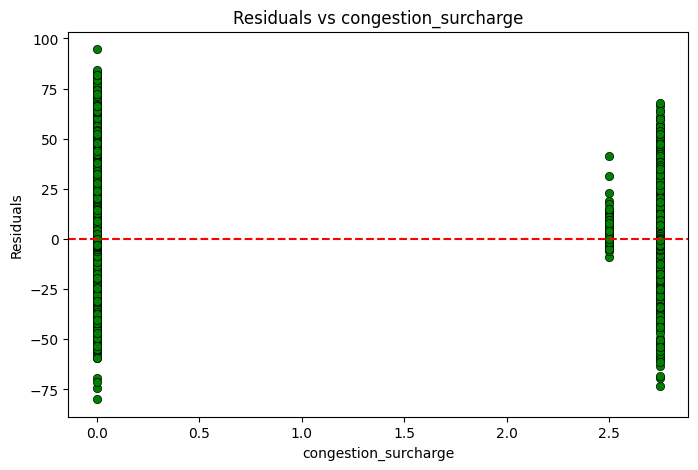

In [ ]:
# Residual Analysis
from data import *
from model import *

taxi_type = GREEN
# train_sql = getSqlForModeling(taxi_type, isTrain=True)
test_sql = getSqlForModeling(taxi_type, isTrain=False)

model = loadModel(f'{taxi_type}_{VARIABLE}_{LINEAR_REGRESSION}')

# Predictions
with DR.engn.connect() as conn:
    processed = 0
    y_t_chunk = []
    y_p_chunk = []
    X_t_chunk = []
    for df in pd.read_sql(test_sql, conn, chunksize=CHUNK_SIZE):
        processed += len(df)
        X = df[FEATURES]
        X_t_chunk.append(X)
        y_t_chunk.append(df[VARIABLE])

        y_p_chunk.append(model.predict(X))
        O.out(f'Predicted {processed} rows')

# Performance
X_test = pd.concat(X_t_chunk, ignore_index=True)
y_test = pd.concat(y_t_chunk, ignore_index=True)
y_pred = np.concatenate(y_p_chunk)


residualAnalysis(X_test, y_test, y_pred)